# Курс ["Алгоритмы анализа данных"](https://gb.ru/lessons/177362)

# Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

## Задание 1.

### Сгенерировать датасет при помощи `sklearn.datasets.make_regression` 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
X, y, coef = datasets.make_regression(n_samples=100, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

### Обучить линейную модель при помощи градиентного спуска и либо стохастического градиентного спуска, либо mini-batch градиентного спуска

In [ ]:
from myalglib import MyGD, MySGD, MyMiniBatchGD

Сначала обучим обычную линейную регрессию с сырыми, нормализованными и стандартизированными данными:

In [ ]:
%time

lr = MyGD(iter_num=1e4, random_seed=42)
lr.fit(X, y)

lr_nrm = MyGD(iter_num=1e4, random_seed=42, scaler='normal')
lr_nrm.fit(X, y)

lr_std = MyGD(iter_num=1e4, random_seed=42, scaler='standart')
lr_std.fit(X,y)

# lr.err_logs lr_nrm.err_logs lr_std.err_logs

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs


Теперь стохастическую линейную регрессию:

In [ ]:
%time

slr = MySGD(iter_num=1e4, random_seed=42)
slr.fit(X, y)

slr_nrm = MySGD(iter_num=1e4, random_seed=42, scaler='normal')
slr_nrm.fit(X, y)

slr_std = MySGD(iter_num=1e4, random_seed=42, scaler='standart')
slr_std.fit(X,y)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs


#### <font color='red'>  *Попытался сделать класс с минибатчами, но он улетел в космос по времени. Буду рад, если вы сможете объяснить почему так произошло. Или сам попробую разобраться позже*

In [ ]:
# mblr = MyMiniBatchGD(iter_num=1e4, random_seed=42, qty_in_batch=5)
# mblr.fit(X, y)

# mblr_nrm = MyMiniBatchGD(iter_num=1e4, random_seed=42, scaler='normal', qty_in_batch=5)
# mblr_nrm.fit(X, y)

# mblr_std = MyMiniBatchGD(iter_num=1e4, random_seed=42, scaler='standart',qty_in_batch=5)
# mblr_std.fit(X,y)

### Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке

In [ ]:
mse_comparison = pd.DataFrame(
                    np.array([lr.err_logs, lr_nrm.err_logs, lr_std.err_logs,
                               slr.err_logs, slr_nrm.err_logs, slr_std.err_logs]).T,
                    columns=['GD', 'GD with normalization', 'GD with regulation',
                            'SGD', 'SGD with normalization', 'SGD with regulation']
                            )
mse_comparison.tail()

,GD,GD with normalization,GD with regulation,SGD,SGD with normalization,SGD with regulation
9995,28.764911,10577.427624,83.660583,3977.355762,5493.781989,3722.031889
9996,28.764911,10577.416333,83.660583,410.390828,541.211218,417.088357
9997,28.764911,10577.405043,83.660583,290.833026,398.041689,253.168603
9998,28.764911,10577.393755,83.660583,290.823343,398.033875,253.160786
9999,28.764911,10577.382469,83.660583,498.758021,809.393436,633.457429


<AxesSubplot:>

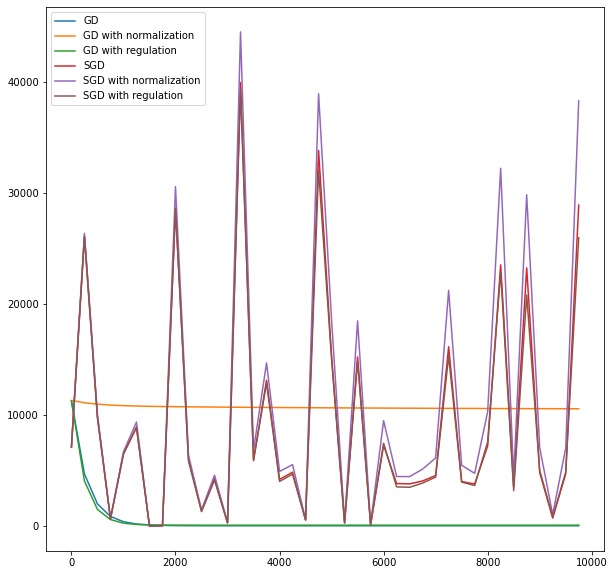

In [ ]:
(
    mse_comparison
    .iloc[[i for i in range(0, 10000, 250)],:]
    .plot(figsize=[10,10])
)

<AxesSubplot:>

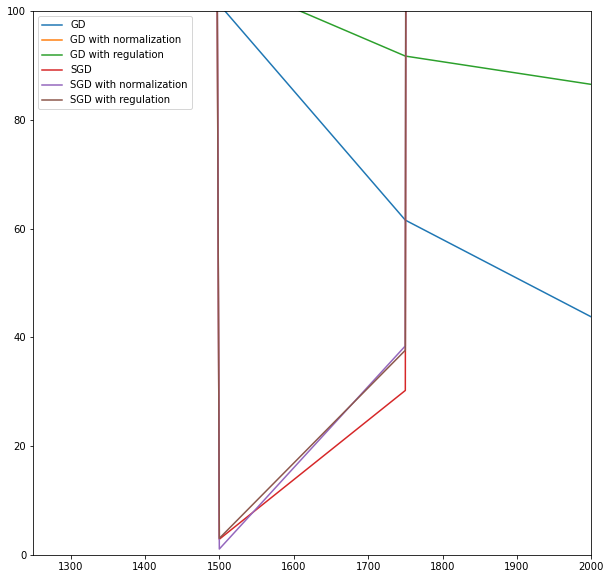

In [ ]:
(
    mse_comparison
    .iloc[[i for i in range(0, 10000, 250)],:]
    .plot(figsize=[10,10], xlim=[1250,2000], ylim=[0,100])
)

### Cделать выводы о разнице скорости сходимости каждого из методов

*На синтетических данных методы SG теряют свою эфективность до 2500 итерации. При этом использование SGD дало случайно хороший результат на 1500 итерации - ошибка упала до минимальных значений.*

## Задание 2. 

### Модифицировать решение первого задания путем добавления L2 регуляризации и сравнить результаты.  

In [ ]:
lr_l2 = MySGD(iter_num=1e4, random_seed=42)
lr_l2.fit(X, y, penalty='l2')

slr_l2 = MySGD(iter_num=1e4, random_seed=42)
slr_l2.fit(X, y, penalty='l2')

In [ ]:
mse_comparison = pd.DataFrame(np.array([lr.err_logs, slr.err_logs, 
                                        slr_l2.err_logs, slr_l2.err_logs]).T,
                            columns=['GD', 'SGD', 'GD with L2','SGD with L2'])

mse_comparison['difference for GD'] = mse_comparison['GD'] - mse_comparison['GD with L2']
mse_comparison['difference for SGD'] = mse_comparison['SGD'] - mse_comparison['SGD with L2']
mse_comparison.tail()

,GD,SGD,GD with L2,SGD with L2,difference for GD,difference for SGD
9995,28.764911,3977.355762,3977.355929,3977.355929,-3948.591018,-0.000168
9996,28.764911,410.390828,410.390848,410.390848,-381.625937,-0.000020
9997,28.764911,290.833026,290.833030,290.833030,-262.068119,-0.000004
9998,28.764911,290.823343,290.823346,290.823346,-262.058435,-0.000004
9999,28.764911,498.758021,498.758036,498.758036,-469.993125,-0.000015


<AxesSubplot:>

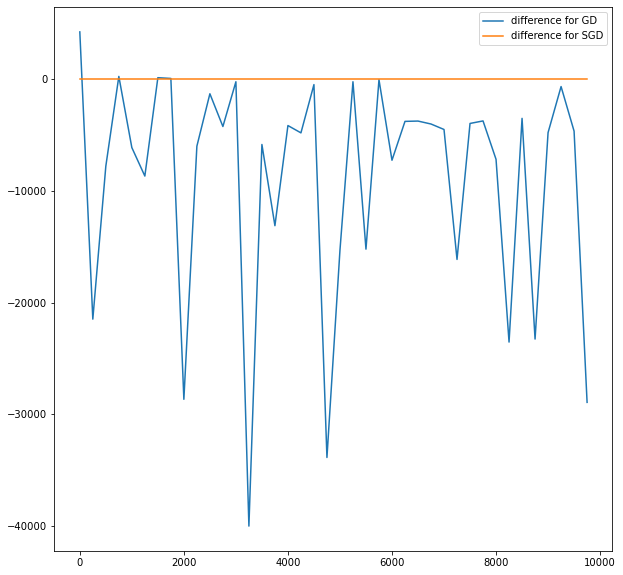

In [ ]:
(
    mse_comparison[['difference for GD', 'difference for SGD']]
    .iloc[[i for i in range(0, 10000, 250)],:]
    .plot(figsize=[10,10])
)

<AxesSubplot:>

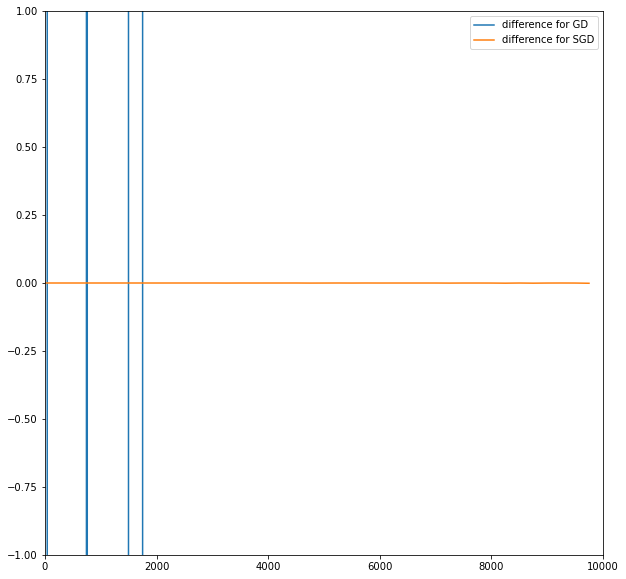

In [ ]:
(
    mse_comparison[['difference for GD', 'difference for SGD']]
    .iloc[[i for i in range(0, 10000, 250)],:]
    .plot(figsize=[10,10], xlim=[0,10000], ylim=[-1, 1])
)

 *Применение L2-регуляризации не повлияло на результаты стохастического градиентного спуска*

## Задание 3. 

### Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [ ]:
lr_l1 = MySGD(iter_num=1e4, random_seed=42)
lr_l1.fit(X, y, penalty='l1')

slr_l1 = MySGD(iter_num=1e4, random_seed=42)
slr_l1.fit(X, y, penalty='l1')

In [ ]:
mse_comparison = pd.DataFrame(np.array([lr.err_logs, slr.err_logs, 
                                        slr_l2.err_logs, slr_l2.err_logs]).T,
                            columns=['GD', 'SGD', 'GD with L1','SGD with L1'])

mse_comparison['difference for GD'] = mse_comparison['GD'] - mse_comparison['GD with L1']
mse_comparison['difference for SGD'] = mse_comparison['SGD'] - mse_comparison['SGD with L1']
mse_comparison.tail()

,GD,SGD,GD with L1,SGD with L1,difference for GD,difference for SGD
9995,28.764911,3977.355762,3977.355929,3977.355929,-3948.591018,-0.000168
9996,28.764911,410.390828,410.390848,410.390848,-381.625937,-0.000020
9997,28.764911,290.833026,290.833030,290.833030,-262.068119,-0.000004
9998,28.764911,290.823343,290.823346,290.823346,-262.058435,-0.000004
9999,28.764911,498.758021,498.758036,498.758036,-469.993125,-0.000015


<AxesSubplot:>

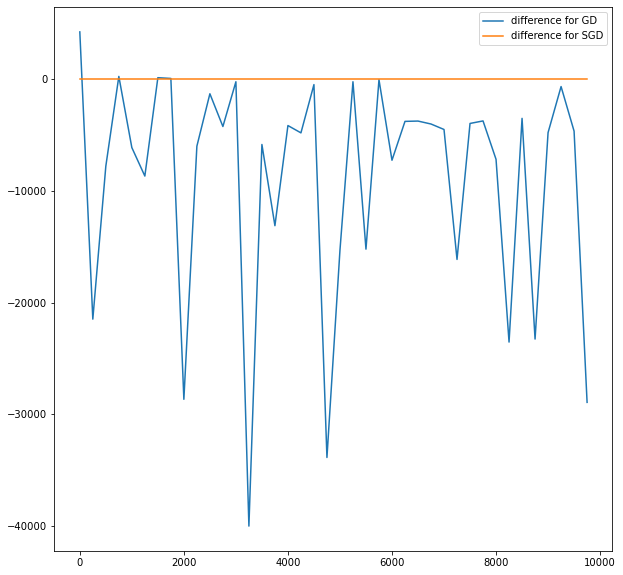

In [ ]:
(
    mse_comparison[['difference for GD', 'difference for SGD']]
    .iloc[[i for i in range(0, 10000, 250)],:]
    .plot(figsize=[10,10])
)

<AxesSubplot:>

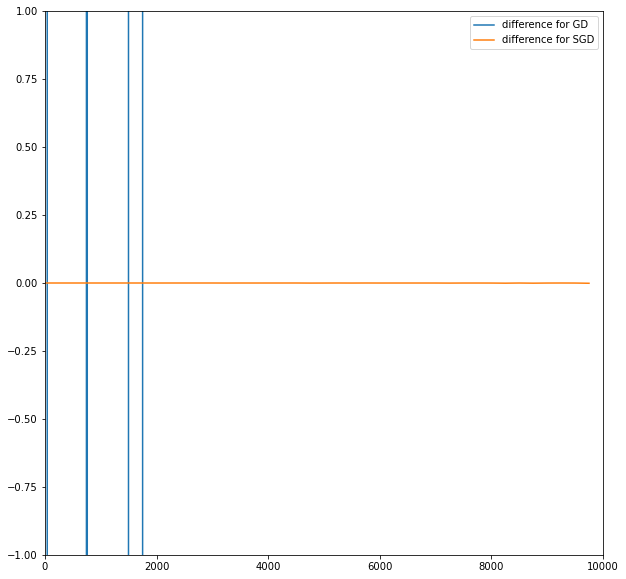

In [ ]:
(
    mse_comparison[['difference for GD', 'difference for SGD']]
    .iloc[[i for i in range(0, 10000, 250)],:]
    .plot(figsize=[10,10], xlim=[0,10000], ylim=[-1, 1])
)

*аналогичный результат при заданных условиях*

## Задание 4. 

### Построить график изменения весов от числа итераций при GD и SGD (или mbGD) на одном рисунке.

In [ ]:
lr_ws = pd.DataFrame(list(list(zip(*lr.logs))[1]), 
                 columns = ['GD w1','GD w2'])
slr_ws = pd.DataFrame(list(list(zip(*slr.logs))[1]), 
                 columns = ['SGD w1','SGD w2'])


<AxesSubplot:>

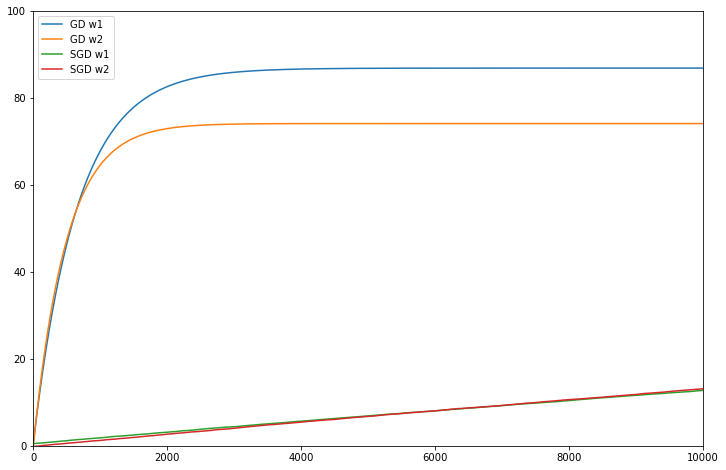

In [ ]:
pd.concat([lr_ws, slr_ws], axis=1).plot(figsize=[12,8], xlim=[0,10000], ylim=[0, 100])

## Задание 5. 

### Построить график изменения весов для L1 и L2 регуляризации от коэффициента регуляризации.

In [ ]:
res_df = pd.DataFrame()
ls = [round(0.1**i,10) for i in range(1,9,2)]
for i in ls:
    lr_l1 = MyGD(iter_num=1e3, random_seed=42, lambda_=i)
    lr_l1.fit(X, y, penalty='l1') 
    
#     lr_l2 = MyGD(iter_num=1e3, random_seed=42, lambda_=i)
#     lr_l2.fit(X, y, penalty='l2')
    
    lr_ws = pd.DataFrame(list(list(zip(*lr.logs))[1]), 
                         columns = ['GD w1','GD w2'])
#     slr_ws = pd.DataFrame(list(list(zip(*slr.logs))[1]), 
#                          columns = ['SGD w1','SGD w2'])
    if i == ls[0]:
        res_df = lr_ws
    else:
        res_df = pd.concat([res_df, res_df], axis=1)
    
    
    

<AxesSubplot:>

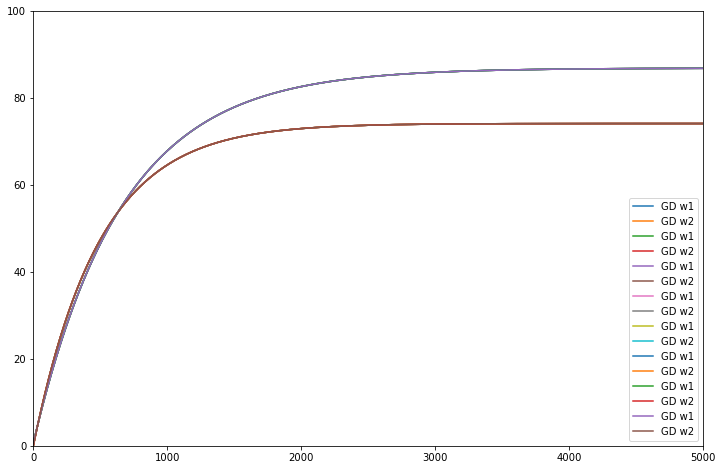

In [ ]:
res_df.plot(figsize=[12,8], xlim=[0,5000], ylim=[0, 100])

*я не вижу разницы. Возможно, где-то совершил ошибку?..*